### Importing the data and the functions

In [1]:
include("importData.jl")
include("DDEmodel.jl")
include("Hill.jl")
include("ODEmodel.jl")
include("plot.jl")

# import data from the path

# population data, g2 data, g1 data, initial number of cells in g1, initial number of cells in g2
# lapatinib
pop_l, g2_l, g1_l, g1_0_l, g2_0_l = import_data(joinpath("..", "data", "lap.csv"),
        joinpath("..", "data", "lap_pop.csv"));

# doxorubicin
pop_d, g2_d, g1_d, g1_0_d, g2_0_d = import_data(joinpath("..", "data", "dox.csv"),
        joinpath("..", "data", "dox_pop.csv"));

# gemcitabine
pop_g, g2_g, g1_g, g1_0_g, g2_0_g = import_data(joinpath("..", "data", "gem.csv"),
        joinpath("..", "data", "gem_pop.csv"));

# paclitaxel
pop_t, g2_t, g1_t, g1_0_t, g2_0_t = import_data(joinpath("..", "data", "taxol1.csv"),
        joinpath("..", "data", "taxol1_pop.csv"));

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:30
└ @ Main /home/farnazm/dde/improve_fit/DrugResponseModel.jl/src/importData.jl:30
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = import_data(::String, ::String) at importData.jl:57
└ @ Main /home/farnazm/dde/improve_fit/DrugResponseModel.jl/src/importData.jl:57


### A) cartoon 

In [2]:
# will do in the Affinity designer of power point

### B) ODE fitting of Lapatinib data

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = ode_plotIt(::Array{Float64,1}, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}, ::DataFrame, ::Int64, ::String) at ODEmodel.jl:59
└ @ Main /home/farnazm/dde/improve_fit/DrugResponseModel.jl/src/ODEmodel.jl:59


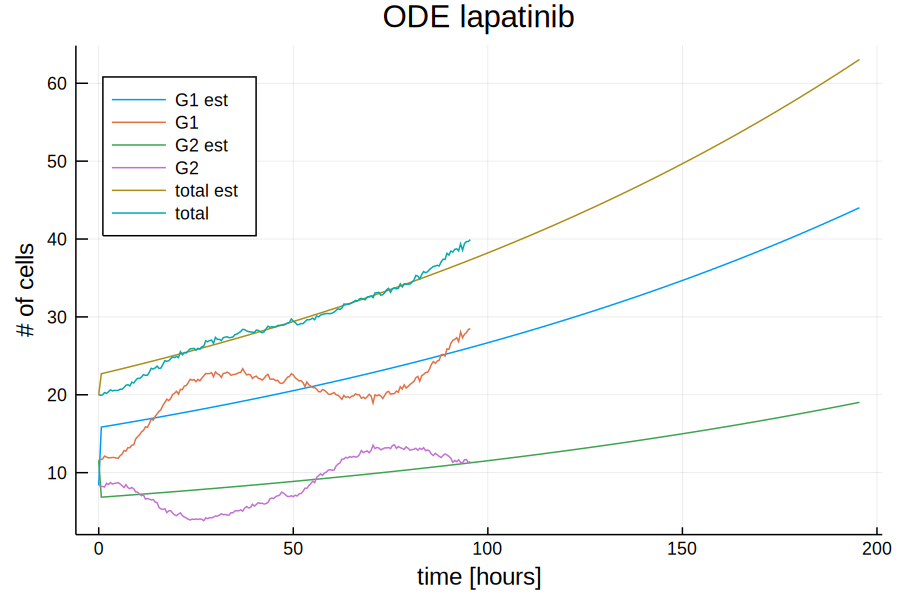

In [3]:
i = 6 # trial number

# calling the initial values
param_lap_ode = CSV.read("..//data//params_lap_ODE.csv")

# initial guesses for the parameters
lap = convert(Matrix, param_lap_ode[1:4,2:end]); 
p  = lap[:, i]

# setting lowest delay for tau1 to be half an hour and for tau2 to be 3 hours.
low = 0.05*ones(4)
upp = 20*ones(4)

# ODE optimization and estimation of the parameters
params_ode = ode_optimIt(p, low, upp, i, g1_l, g2_l, g1_0_l, g2_0_l)

# plotting the fitted curves
ode_plotIt(params_ode, g1_l, g2_l, g1_0_l, g2_0_l, pop_l, i, "ODE lapatinib")

### F) DDE fitting for lapatinib

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}, ::DataFrame, ::Int64, ::String) at plot.jl:32
└ @ Main /home/farnazm/dde/improve_fit/DrugResponseModel.jl/src/plot.jl:32


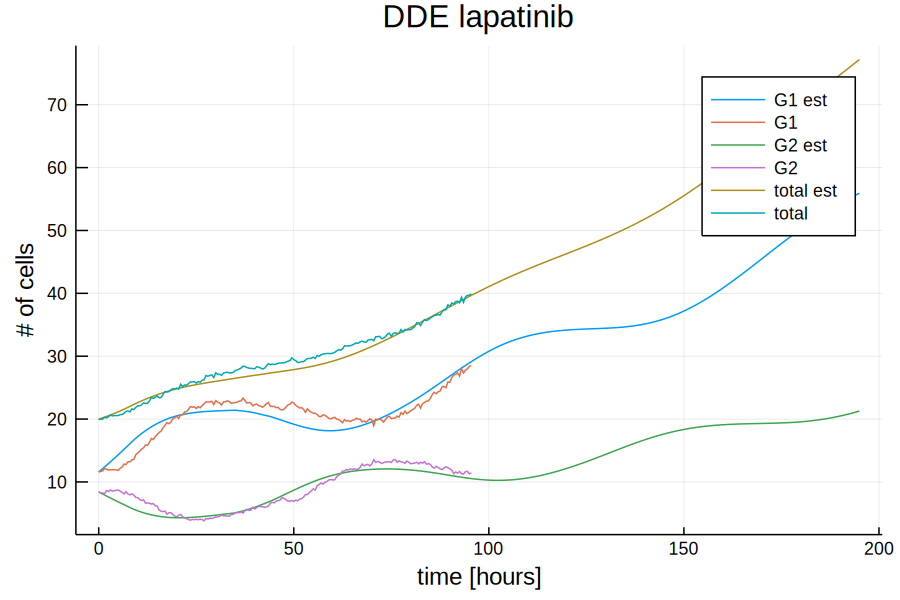

In [4]:
# calling the estimated parameters for lapatinib
param_lap = CSV.read("..//data//Parameters_L.csv")

# calling the concentrations for each drug
param_lap_dde = CSV.read(joinpath("..", "data", "params_lap_DDE.csv"))
conc_lap = [param_lap_dde[8,col] for col in 2:9]

# j showas the trial number, which could be from 1:control, ..., 8: maximum drug concentraation
j = 6
plotIt(param_lap[:, j], g1_l, g2_l, g2_0_l, g1_0_l, pop_l, j, "DDE lapatinib")

### G) DDE parameters for lapatinib

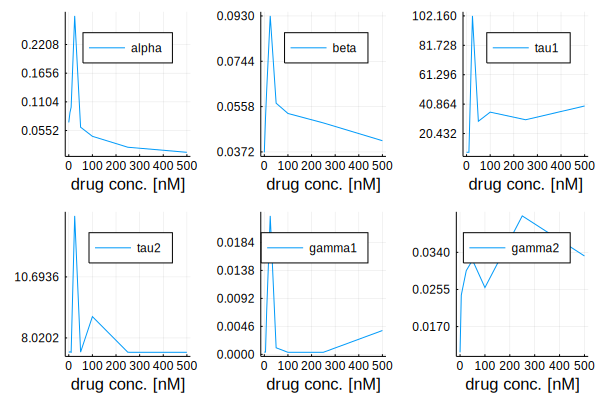

In [9]:
param_lap=permutedims(Matrix(param_lap))

p1 = plot(conc_lap, param_lap[1,:], xlabel = "drug conc. [nM]", label="alpha",
    ylabel = "", yticks = 0.0:round(maximum(param_lap[1,:])/5 ,digits = 4):maximum(param_lap[1,:]))

p2 = plot(conc_lap, param_lap[2,:], xlabel = "drug conc. [nM]", label = "beta",
    ylabel = "", yticks = 0.0:round(maximum(param_lap[2,:])/5 ,digits = 4):maximum(param_lap[2,:]))

p3 = plot(conc_lap, param_lap[3,:], xlabel = "drug conc. [nM]", label="tau1",
    ylabel = "", yticks = 0.0:round(maximum(param_lap[3,:])/5 ,digits = 4):maximum(param_lap[3,:]))

p4 = plot(conc_lap, param_lap[4,:], xlabel = "drug conc. [nM]", label = "tau2",
    ylabel = "", yticks = 0.0:round(maximum(param_lap[4,:])/5 ,digits = 4):maximum(param_lap[4,:]))

p5 = plot(conc_lap, param_lap[5,:], xlabel = "drug conc. [nM]", label = "gamma1",
    ylabel = "", yticks = 0.0:round(maximum(param_lap[5,:])/5 ,digits = 4):maximum(param_lap[5,:]))

p6 = plot(conc_lap, param_lap[6,:], xlabel = "drug conc. [nM]", label = "gamma2",
    ylabel = "", yticks = 0.0:round(maximum(param_lap[6,:])/5 ,digits = 4):maximum(param_lap[6,:]))

plot(p1, p2, p3, p4, p5, p6, dpi = 100)


### H) DDE Hill fitting 

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 51 steps and 12.44 seconds
Termination reason: Max number of steps (50) reached
Steps per second = 4.10
Function evals per second = 7.23
Improvements/step = 0.50000
Total function evaluations = 90


Best candidate found: [133.687, 3.65706, 0.00697445, 0.0284315, 0.0671237, 0.0489122, 9.60806, 38.3573, 13.3927, 6.0298, 0.00176752, 0.0416491]

Fitness: 866637.175216708



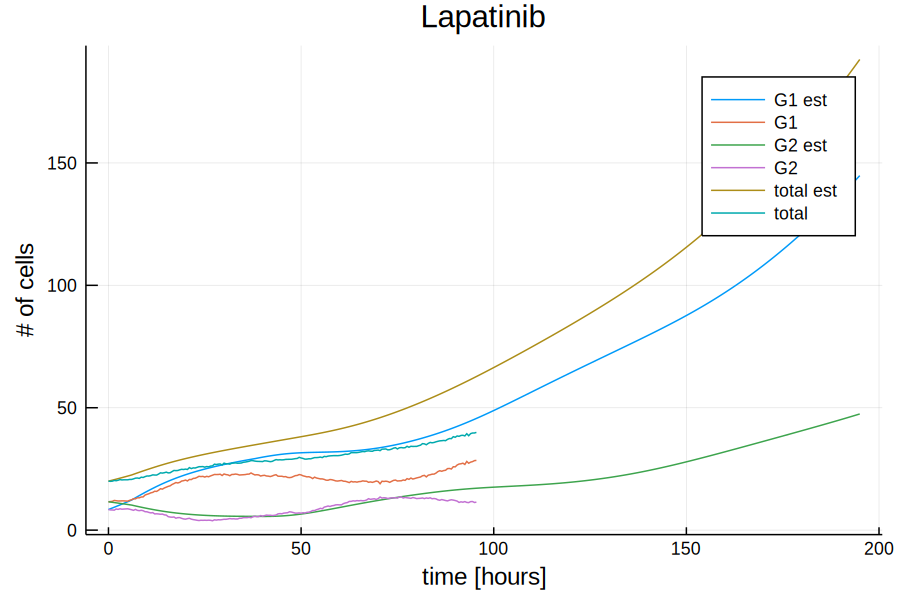

In [6]:
#  [EC50, b_steepness, alpha_min, alpha_max, beta_min, beta_max, tau1_mean, tau1_max, tau2_min, tau2_max, gamma1_max, gamma2_max]

# guess
guess = [100.0, 1.0 , 0.007, 0.01, 0.05, 0.045, 8.0286, 30.1100, 12.0, 8.0, 0.0035, 0.04]

# max num of steps
num_steps=50

# optimize and return the estimated hill parameters
parameterrs, pp = optimize_hill(guess, conc_lap, g1_l, g2_l, g1_0_l, g2_0_l, num_steps)

# easy way to convert the hill parameters to DDE parameters
p = getDDEparams(pp, conc_lap)

j = 6 # trial number
# for instance we want to plot the data and estimated for some trial 
plotIt(p[:, j], g1_l, g2_l, g1_0_l, g2_0_l, pop_l, j, "Lapatinib")

### I) DDE Hill Parameters

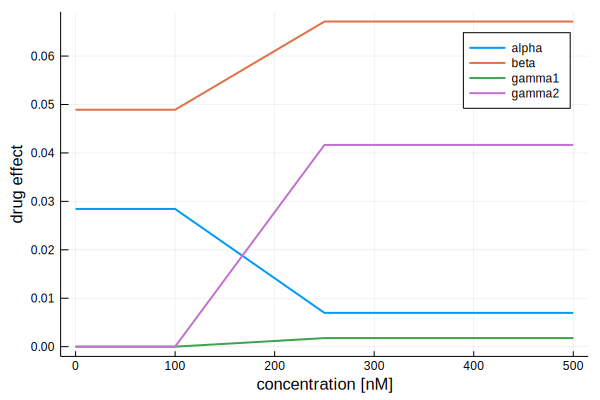

In [7]:
# plot
plot(conc_lap, p[1, :], label = "alpha", linewidth = 2, xlabel = "concentration [nM]", ylabel = "drug effect")
plot!(conc_lap, p[2, :], label = "beta", linewidth = 2, legend =:best)
plot!(conc_lap, p[5, :], label = "gamma1", linewidth = 2)
plot!(conc_lap, p[6, :], label = "gamma2", linewidth = 2)


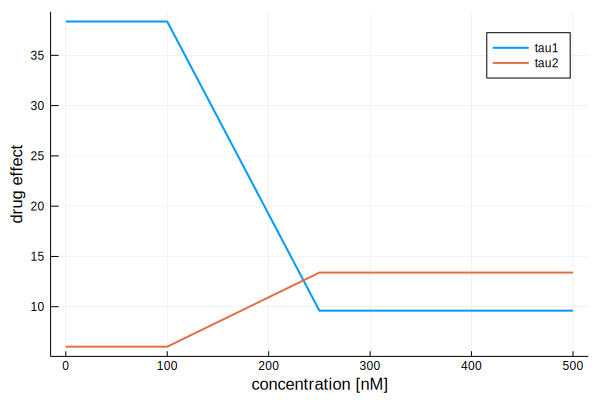

In [8]:
plot(conc_lap, p[3, :], label = "tau1", linewidth = 2, xlabel = "concentration [nM]", ylabel = "drug effect")
plot!(conc_lap, p[4, :], label = "tau2", linewidth = 2, legend =:best)